In [1]:
# import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import kurtosis, skew

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.cluster import FeatureAgglomeration

from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram

## Data Processing

In [2]:
df_og = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df_og.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1.0,1.0,1.0,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2.0,1.0,2.0,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1.0,9.0,3.0,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3.0,1.0,4.0,Returning_Visitor,True,False


In [4]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12067 entries, 0 to 12066
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12067 non-null  int64  
 1   Administrative_Duration  12067 non-null  float64
 2   Informational            12067 non-null  int64  
 3   Informational_Duration   12067 non-null  float64
 4   ProductRelated           12067 non-null  int64  
 5   ProductRelated_Duration  12067 non-null  float64
 6   BounceRates              12066 non-null  float64
 7   ExitRates                12066 non-null  float64
 8   PageValues               12066 non-null  float64
 9   SpecialDay               12066 non-null  float64
 10  Month                    12066 non-null  object 
 11  OperatingSystems         12066 non-null  float64
 12  Browser                  12066 non-null  float64
 13  Region                   12066 non-null  float64
 14  TrafficType           

## One-Hot Encoding & Dummy Variables

In [5]:
# get dummy variables and one-hot encoding
df_og['Weekend'] = df_og['Weekend'].replace({True: 1, False: 0})
df_og['Revenue'] = df_og['Revenue'].replace({True: 1, False: 0})
df = pd.get_dummies(df_og)
df = df.fillna(0)

In [6]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


## Plotting Distributions & Statistics of Variables

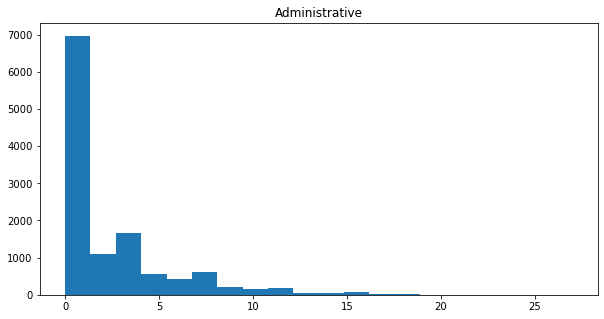

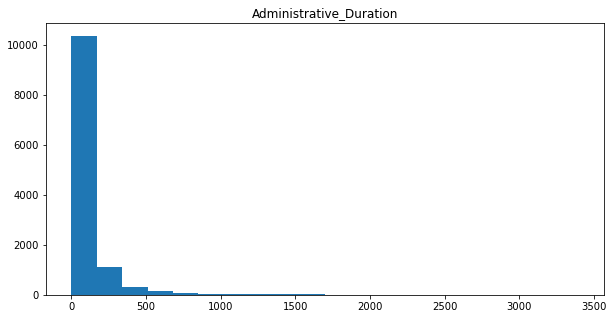

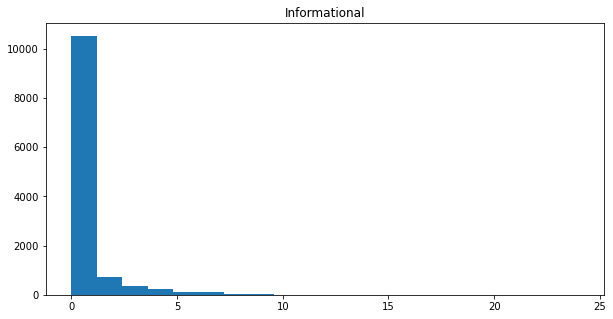

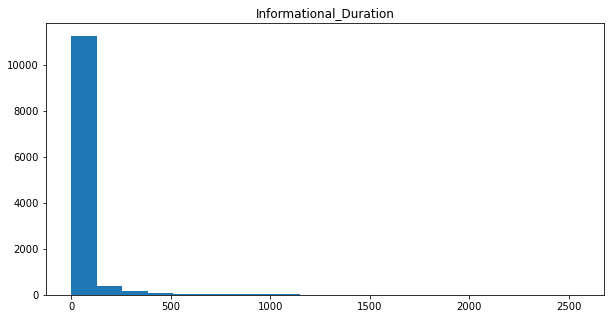

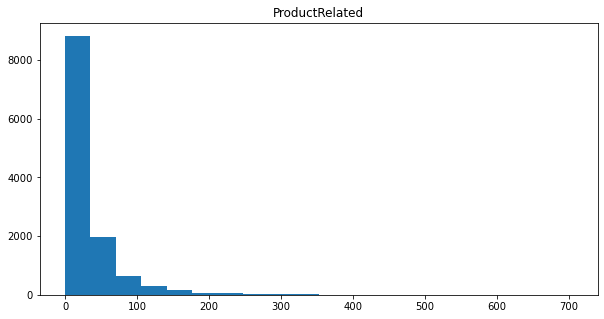

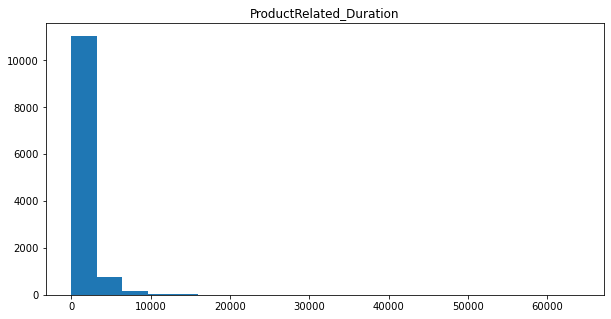

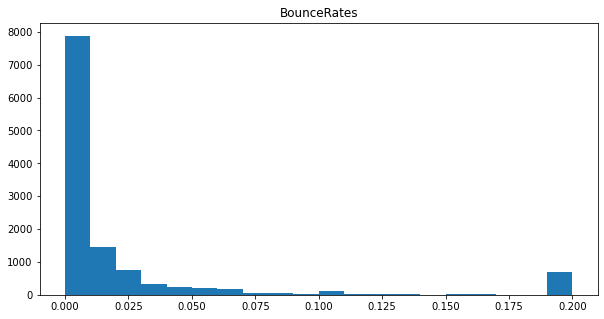

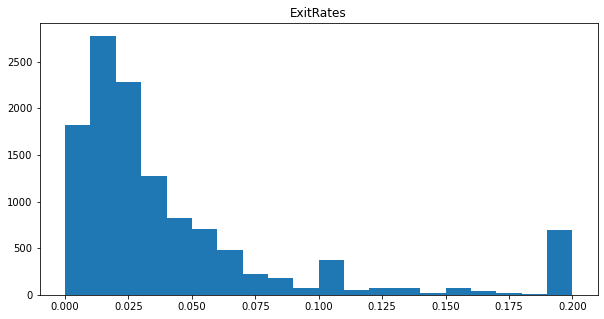

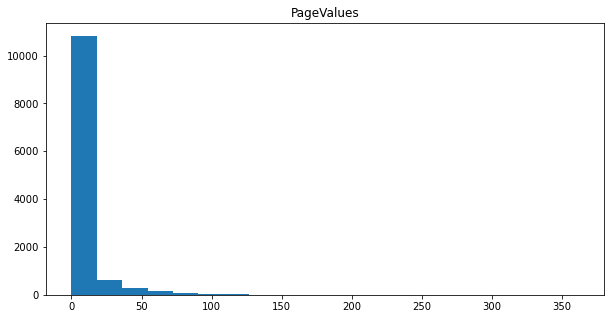

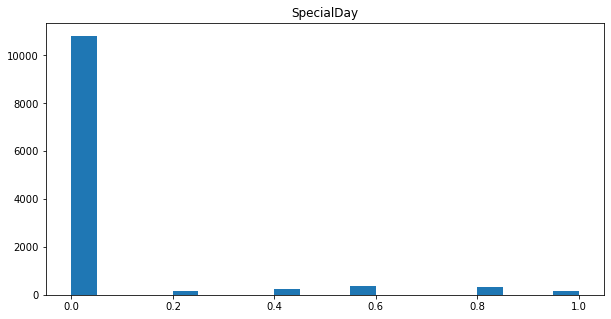

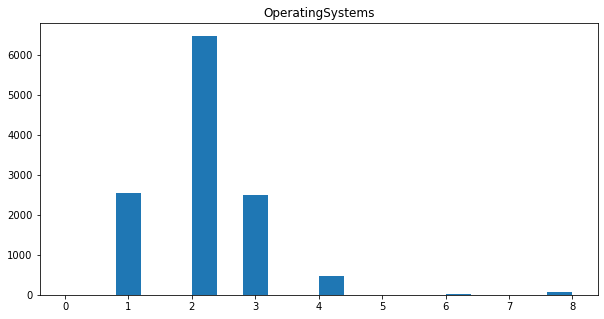

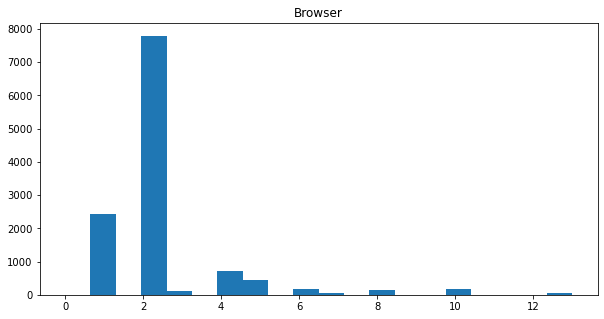

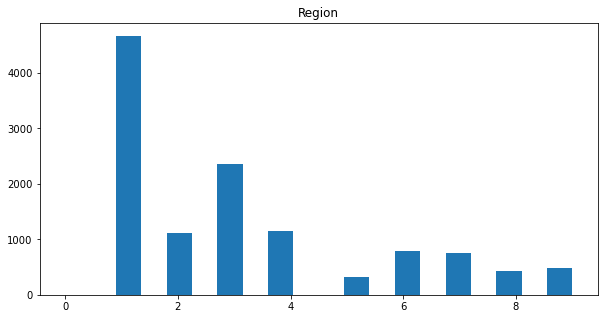

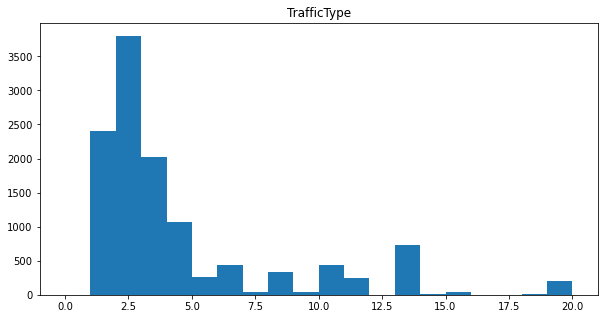

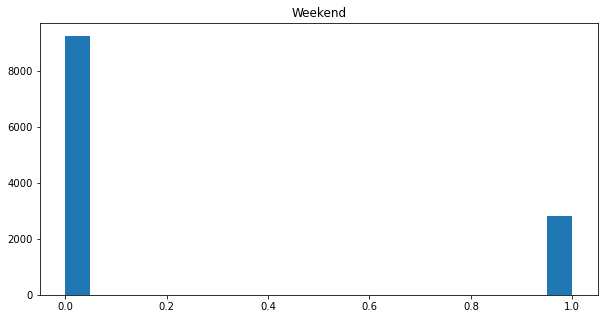

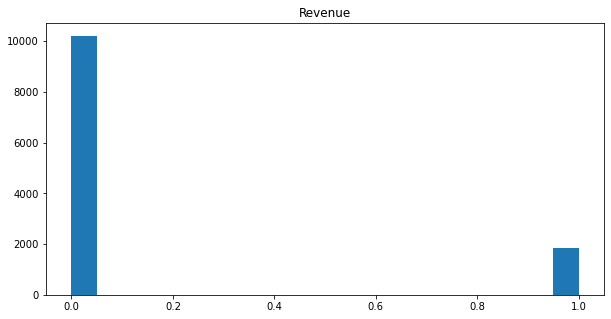

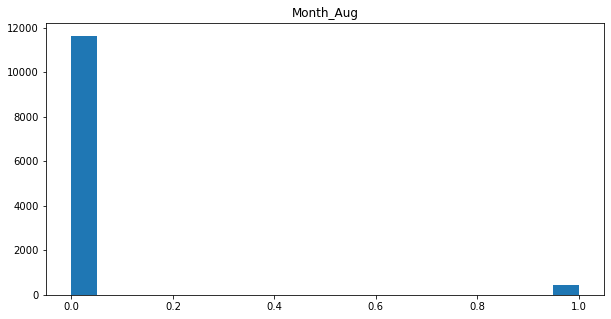

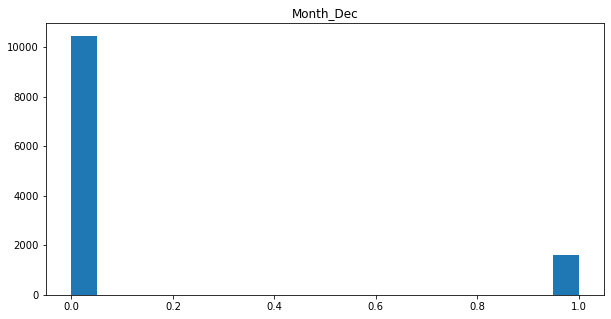

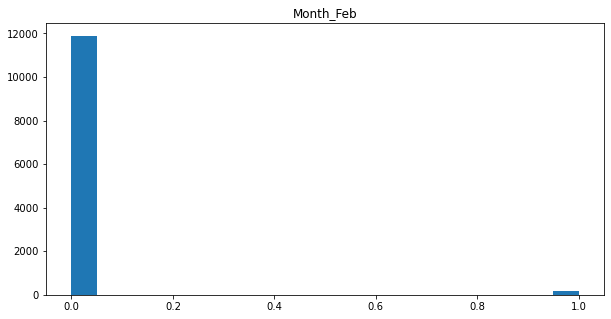

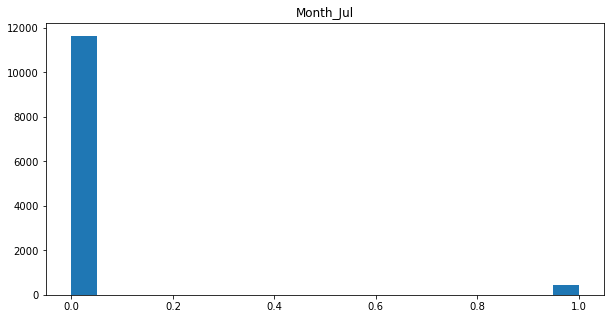

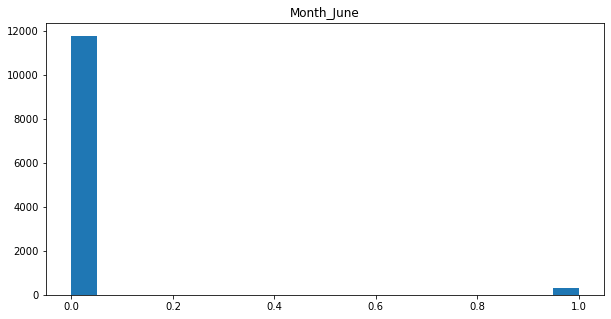

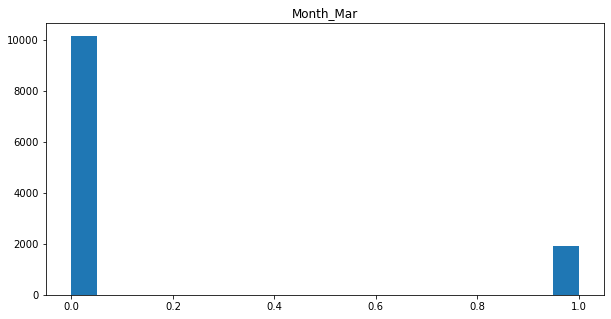

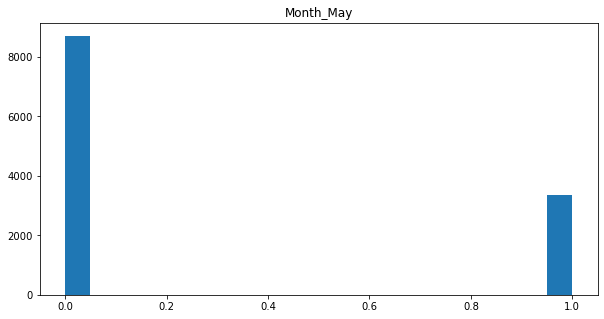

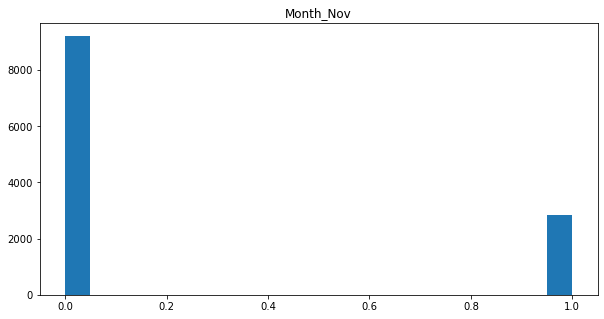

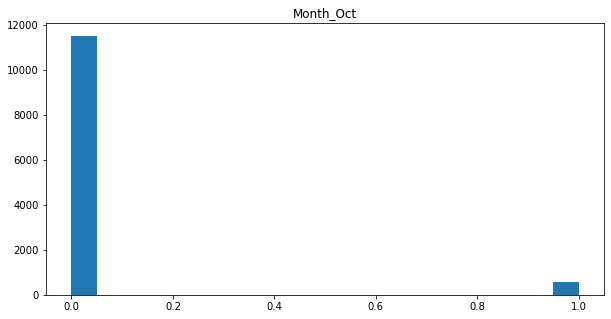

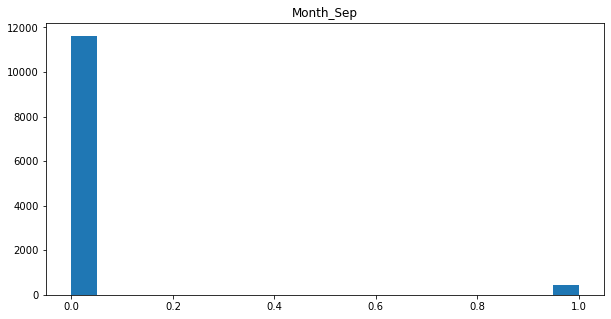

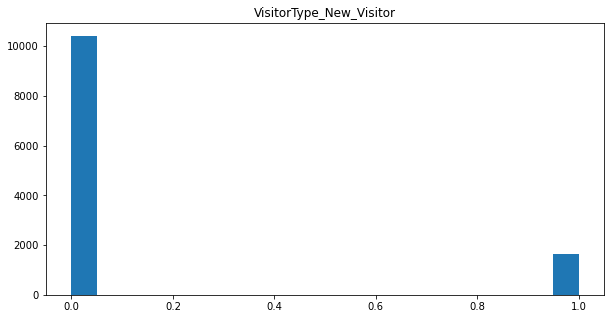

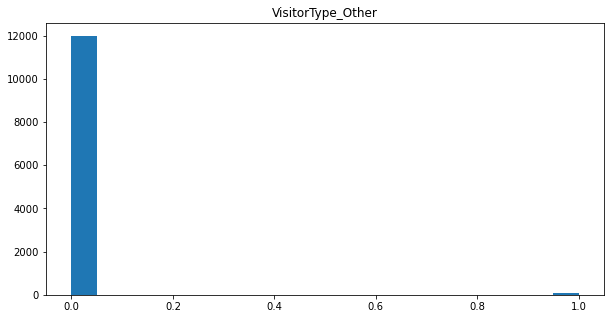

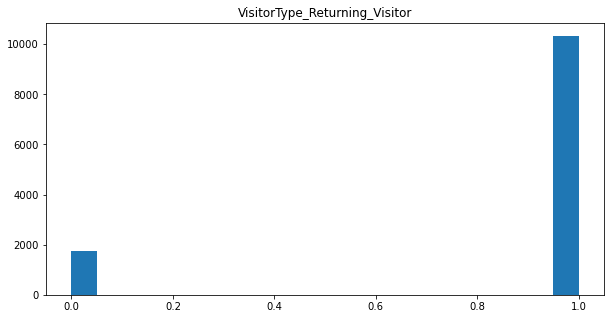

In [7]:
for i in range(len(df.columns)):
    if type(df[df.columns[i]][0]) == str or type(df[df.columns[i]][0]) == bool:
        continue
    plt.figure(figsize=(10,5))
    plt.title(df.columns[i])
    plt.hist(df[df.columns[i]], bins=20)
    plt.show()

In [8]:
# getting all kurtosis and skewness for features
kurt = []
sk = []
for i in range(len(df.columns)):
    kurt.append([df.columns[i], kurtosis(df[df.columns[i]])])
    sk.append([df.columns[i], skew(df[df.columns[i]])])
    print("Kurtosis for {} is: {}".format(df.columns[i], kurtosis(df[df.columns[i]])))
    print("Skew for {} is: {}".format(df.columns[i], skew(df[df.columns[i]])))
    print('---')

Kurtosis for Administrative is: 4.581598019652326
Skew for Administrative is: 1.9497027003513965
---
Kurtosis for Administrative_Duration is: 51.59301842011615
Skew for Administrative_Duration is: 5.658158814243953
---
Kurtosis for Informational is: 27.262109473630588
Skew for Informational is: 4.033681366195814
---
Kurtosis for Informational_Duration is: 76.8596214912399
Skew for Informational_Duration is: 7.618836830862092
---
Kurtosis for ProductRelated is: 32.07974168391044
Skew for ProductRelated is: 4.399855074753599
---
Kurtosis for ProductRelated_Duration is: 141.34993001817523
Skew for ProductRelated_Duration is: 7.4082324200730945
---
Kurtosis for BounceRates is: 7.666055178984715
Skew for BounceRates is: 2.9389057312445033
---
Kurtosis for ExitRates is: 3.97901838395114
Skew for ExitRates is: 2.1416559394981225
---
Kurtosis for PageValues is: 66.61928890436889
Skew for PageValues is: 6.410620330466584
---
Kurtosis for SpecialDay is: 9.599170592120599
Skew for SpecialDay is: 

In [9]:
# sorting kurtosis and skewness
kurt.sort(key=lambda x:x[1])
sk.sort(key=lambda x:x[1])

In [10]:
# sorted feature kurtosis
kurt

[['Month_May', -1.0263679286722094],
 ['Month_Nov', -0.45406435750056984],
 ['Weekend', -0.39240059071916944],
 ['Region', -0.15290736666670224],
 ['Month_Mar', 1.5154367560046103],
 ['Revenue', 1.6631255292286857],
 ['VisitorType_Returning_Visitor', 2.1229681212003575],
 ['VisitorType_New_Visitor', 2.4330554486070195],
 ['Month_Dec', 2.6353861412279294],
 ['TrafficType', 3.466038471826769],
 ['ExitRates', 3.97901838395114],
 ['Administrative', 4.581598019652326],
 ['BounceRates', 7.666055178984715],
 ['SpecialDay', 9.599170592120599],
 ['OperatingSystems', 10.102065770580204],
 ['Browser', 12.53799975039157],
 ['Month_Oct', 17.02762809521866],
 ['Month_Sep', 21.973825392214724],
 ['Month_Aug', 22.905578774643566],
 ['Month_Jul', 22.969999721466216],
 ['Informational', 27.262109473630588],
 ['ProductRelated', 32.07974168391044],
 ['Month_June', 36.92375584844969],
 ['Administrative_Duration', 51.59301842011615],
 ['Month_Feb', 60.597006044440555],
 ['PageValues', 66.61928890436889],
 [

In [11]:
# sorted feature skewness
sk

[['VisitorType_Returning_Visitor', -2.0305093255635045],
 ['Region', 0.9807882789325015],
 ['Month_May', 0.9867279621698122],
 ['Month_Nov', 1.2433566031108814],
 ['Weekend', 1.2679114358979613],
 ['Month_Mar', 1.8749498009292445],
 ['Revenue', 1.9139293427994377],
 ['Administrative', 1.9497027003513965],
 ['TrafficType', 1.9596002653524935],
 ['OperatingSystems', 1.993375208275691],
 ['VisitorType_New_Visitor', 2.10548223659261],
 ['ExitRates', 2.1416559394981225],
 ['Month_Dec', 2.1529946914072804],
 ['BounceRates', 2.9389057312445033],
 ['Browser', 3.2083447661019635],
 ['SpecialDay', 3.257695165543461],
 ['Informational', 4.033681366195814],
 ['Month_Oct', 4.36206695217057],
 ['ProductRelated', 4.399855074753599],
 ['Month_Sep', 4.896307322075966],
 ['Month_Aug', 4.990548945220712],
 ['Month_Jul', 4.996999071589488],
 ['Administrative_Duration', 5.658158814243953],
 ['Month_June', 6.238890594364487],
 ['PageValues', 6.410620330466584],
 ['ProductRelated_Duration', 7.408232420073094

In [12]:
# full correlation matrix
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
Administrative,1.000000,0.598995,0.376998,0.253593,0.432039,0.372605,-0.223843,-0.316729,0.097736,-0.095883,...,0.006391,-0.001851,-0.055611,-0.065346,0.051826,0.092529,0.060451,0.029582,-0.018919,-0.024631
Administrative_Duration,0.598995,1.000000,0.303757,0.238332,0.289873,0.356822,-0.144386,-0.205589,0.067048,-0.073974,...,-0.001807,-0.019007,-0.022876,-0.039044,0.030595,0.056329,0.032129,0.025161,-0.005837,-0.023279
Informational,0.376998,0.303757,1.000000,0.619614,0.376473,0.389480,-0.116490,-0.163983,0.047227,-0.048317,...,0.002486,0.007766,-0.027318,-0.037552,0.064490,-0.002046,0.010449,-0.052829,-0.018838,0.056162
Informational_Duration,0.253593,0.238332,0.619614,1.000000,0.280439,0.348011,-0.073840,-0.104782,0.029308,-0.030633,...,0.015232,-0.015424,-0.011342,-0.031747,0.037774,0.006653,0.001906,-0.042125,-0.011841,0.044053
ProductRelated,0.432039,0.289873,0.376473,0.280439,1.000000,0.859539,-0.204158,-0.292106,0.057844,-0.022954,...,0.021211,0.016007,-0.114726,-0.070850,0.178656,0.010024,0.006969,-0.121310,-0.033627,0.126524
ProductRelated_Duration,0.372605,0.356822,0.389480,0.348011,0.859539,1.000000,-0.183793,-0.250834,0.053123,-0.035514,...,0.003162,0.002220,-0.084874,-0.066561,0.162457,-0.007925,0.006903,-0.114546,-0.024689,0.117777
BounceRates,-0.223843,-0.144386,-0.116490,-0.073840,-0.204158,-0.183793,1.000000,0.913160,-0.120034,0.073064,...,0.009627,0.041375,-0.004656,0.059097,-0.033625,-0.046750,-0.040698,-0.140859,0.030248,0.131578
ExitRates,-0.316729,-0.205589,-0.163983,-0.104782,-0.292106,-0.250834,0.913160,1.000000,-0.175001,0.102953,...,0.008744,0.048565,0.013157,0.073152,-0.056420,-0.063271,-0.051627,-0.185678,0.034648,0.174680
PageValues,0.097736,0.067048,0.047227,0.029308,0.057844,0.053123,-0.120034,-0.175001,1.000000,-0.064087,...,-0.018273,-0.020866,-0.044480,-0.014265,0.041713,0.032997,0.018098,0.107733,0.039661,-0.114543
SpecialDay,-0.095883,-0.073974,-0.048317,-0.030633,-0.022954,-0.035514,0.073064,0.102953,-0.064087,1.000000,...,-0.060214,-0.048863,-0.135385,0.463063,-0.173688,-0.068224,-0.061361,-0.083785,-0.024713,0.087840


In [13]:
# Revenue correlation table
df.corr()['Revenue']

Administrative                   0.135829
Administrative_Duration          0.092977
Informational                    0.095110
Informational_Duration           0.068042
ProductRelated                   0.157625
ProductRelated_Duration          0.149725
BounceRates                     -0.151046
ExitRates                       -0.207246
PageValues                       0.495437
SpecialDay                      -0.083000
OperatingSystems                -0.015341
Browser                          0.022868
Region                          -0.010787
TrafficType                     -0.005022
Weekend                          0.030140
Revenue                          1.000000
Month_Aug                        0.011330
Month_Dec                       -0.033635
Month_Feb                       -0.047537
Month_Jul                       -0.000815
Month_June                      -0.023206
Month_Mar                       -0.064311
Month_May                       -0.078830
Month_Nov                        0

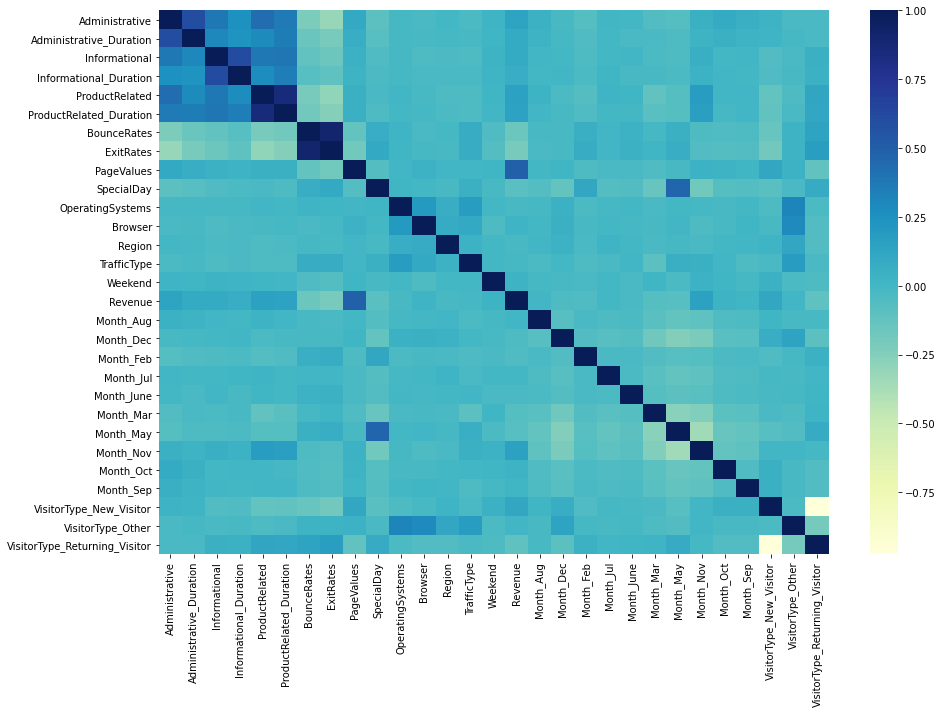

In [14]:
# Heatmap of all variables
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="YlGnBu")
plt.show()

## Sample-Based Hierarchical Clustering

In [15]:
# conducting hierarchical clustering on samples
clustering = AgglomerativeClustering(distance_threshold=0,
                                     n_clusters=None).fit(df)

In [16]:
# SOURCE CODE IN LINK UNDERNEATH
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

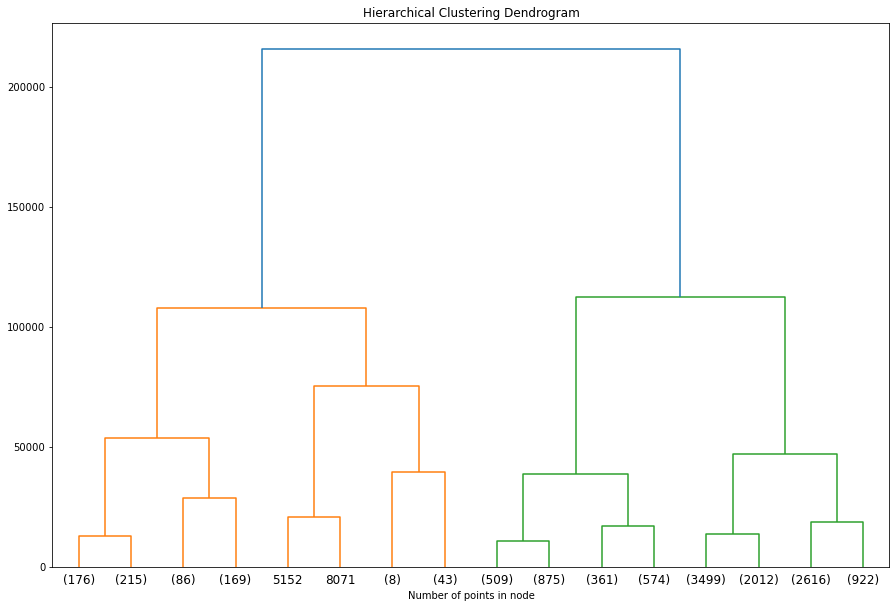

In [17]:
# plotting sample-based dendrogram
plt.figure(figsize=(15,10))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering, truncate_mode='level', p=3)
plt.xlabel("Number of points in node")
plt.show()

In [18]:
# making features list
features = list(df.columns)
features.remove('Revenue')

In [19]:
# creating training and test set
X_train, X_test, y_train, y_test = train_test_split(df[features],
                                                    df['Revenue'],
                                                    test_size=0.3)

## Feature Clustering

In [20]:
# Feature-based hierarchical clustering
agglo = FeatureAgglomeration(n_clusters=7, compute_distances=True)
agglo = agglo.fit(X_train)

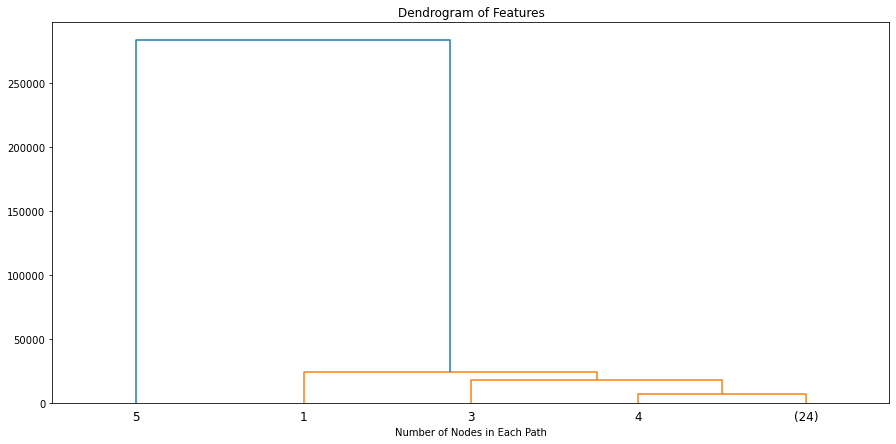

In [21]:
# plotting feature-based dendrogram
plt.figure(figsize=(15,7))
plot_dendrogram(agglo, truncate_mode='level', p=3)
plt.title('Dendrogram of Features')
plt.xlabel('Number of Nodes in Each Path')
plt.show()

In [22]:
# function to print each feature and its cluster given a specific number of clusters (n)
def ag(n):
    agglo = FeatureAgglomeration(n_clusters=n, compute_distances=True)
    agglo = agglo.fit(X_train)
    for i in range(len(agglo.labels_)):
        print("{} : {}".format(X_train.columns[i], agglo.labels_[i]))

In [23]:
# each feature's cluster given 7 clusters
ag(7)

Administrative : 0
Administrative_Duration : 5
Informational : 2
Informational_Duration : 3
ProductRelated : 4
ProductRelated_Duration : 1
BounceRates : 2
ExitRates : 2
PageValues : 6
SpecialDay : 2
OperatingSystems : 0
Browser : 0
Region : 0
TrafficType : 0
Weekend : 2
Month_Aug : 2
Month_Dec : 2
Month_Feb : 2
Month_Jul : 2
Month_June : 2
Month_Mar : 2
Month_May : 2
Month_Nov : 2
Month_Oct : 2
Month_Sep : 2
VisitorType_New_Visitor : 2
VisitorType_Other : 2
VisitorType_Returning_Visitor : 2


In [24]:
# specifying each group
group1 = ['Weekend', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
          'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor']

group2 = ['OperatingSystems', 'Browser', 'Region', 'TrafficType']

group3 = ['BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

group4 = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

In [25]:
# building pca features based off of groups
pca1 = 0
pca2 = 0
pca3 = 0
pca4 = 0

pca1 = PCA(n_components=1, svd_solver='arpack').fit_transform(df[group1])
pca2 = PCA(n_components=1, svd_solver='arpack').fit_transform(df[group2])
pca3 = PCA(n_components=1, svd_solver='arpack').fit_transform(df[group3])
pca4 = PCA(n_components=1, svd_solver='arpack').fit_transform(df[group4])

t = []
for i in range(len(pca1)):
    t.append(pca1[i][0])
    
pca1 = t


t = []
for i in range(len(pca2)):
    t.append(pca2[i][0])
    
pca2 = t


t = []
for i in range(len(pca3)):
    t.append(pca3[i][0])
    
pca3 = t


t = []
for i in range(len(pca4)):
    t.append(pca4[i][0])
    
pca4 = t

In [26]:
# creating new data source
data = {'PCA1':pca1,'PCA2':pca2,'PCA3':pca3,'PCA4':pca4, 'Revenue': df['Revenue']}
pc_group = ['PCA1', 'PCA2', 'PCA3', 'PCA4']

In [27]:
# creating new datafram for pca features
pc_df = pd.DataFrame(data)

In [28]:
pc_df.head()

,PCA1,PCA2,PCA3,PCA4,Revenue
0,-0.075941,-3.259304,-5.855261,-1189.158595,0.0
1,-0.075941,-2.167341,-5.855152,-1125.207910,0.0
2,-0.075941,-0.804394,-5.855261,-1189.158595,0.0
3,-0.075941,-0.089012,-5.855186,-1186.474898,0.0
4,0.051417,-0.078524,-5.855135,-562.158142,0.0


In [29]:
# building random forest model on pca features
pc_rfc = RandomForestClassifier(max_depth=10)
pc_rfc = pc_rfc.fit(pc_df[pc_group], pc_df['Revenue'])

In [30]:
# Feature Importance
for i in range(len(pc_group)):
    print("{} has an importance of {}".format(pc_group[i], round(pc_rfc.feature_importances_[i],2)))

PCA1 has an importance of 0.09
PCA2 has an importance of 0.08
PCA3 has an importance of 0.68
PCA4 has an importance of 0.16


## PCA Features on Entire Dataset

In [31]:
# conducting pca on entire feature set 
pca = PCA(n_components=2, svd_solver='arpack')
pca = pca.fit_transform(df[features])

In [32]:
# getting each feature value
feature_1 = []
feature_2 = []
for i in range(len(pca)):
    feature_1.append(pca[i][0])
    feature_2.append(pca[i][1])

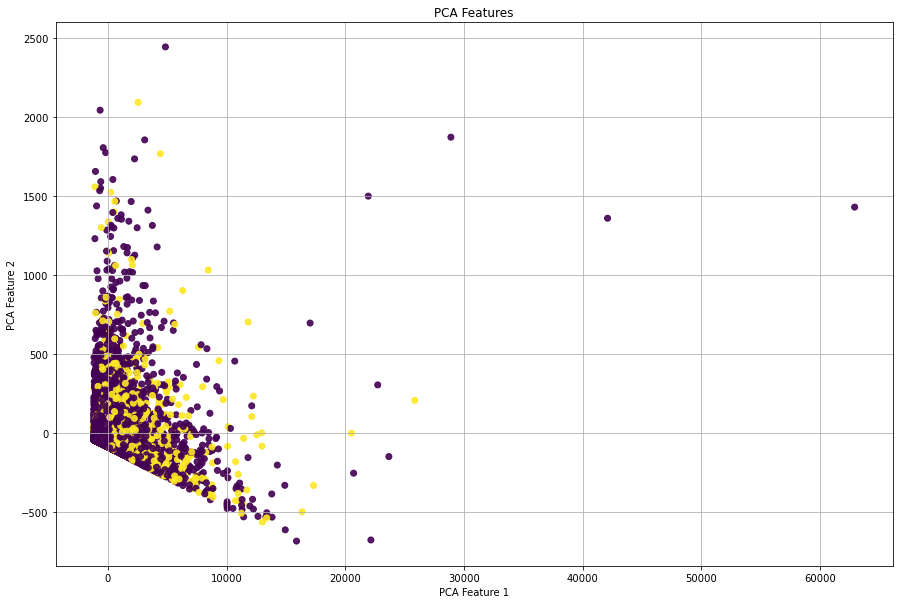

In [33]:
# plotting pca features and revenue
plt.figure(figsize=(15,10))
plt.scatter(feature_1, 
            feature_2, 
            c=df['Revenue'],
            alpha=0.9)
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.title('PCA Features')
plt.grid(True)
plt.show()

In [34]:
df['Revenue'].value_counts()

0.0    10205
1.0     1862
Name: Revenue, dtype: int64

## Conduct Modelling
This was just for comparison, the numbers used in the report come from the models built in KNIME.

In [35]:
# scaling the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [36]:
# scaling the data
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [37]:
# random forest mmodel
clf = RandomForestClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)
print("Random Forest Test Accuracy: {}".format(clf.score(X_test, y_test)))

Random Forest Test Accuracy: 0.9049986191659762


In [38]:
# naive bayes model
nb = GaussianNB()
nb = nb.fit(X_train, y_train)
print("Naive Bayes Test Accuracy: {}".format(nb.score(X_test, y_test)))

Naive Bayes Test Accuracy: 0.8055785694559514


In [39]:
# logistic regression model
log_reg = LogisticRegression(max_iter=100)
log_reg = log_reg.fit(X_train_scaled, y_train)
print("Logistic Regression Accuracy: {}".format(log_reg.score(X_test_scaled, y_test)))

Logistic Regression Accuracy: 0.8873239436619719


In [40]:
# gradient boosting model
gbc = GradientBoostingClassifier().fit(X_train, y_train)
print("Gradient Boosting Accuracy: {}".format(gbc.score(X_test, y_test)))

Gradient Boosting Accuracy: 0.9049986191659762


In [43]:
# sum of sales in each month
df_og.groupby(['Month'])['Revenue'].sum()

Month
Aug      76.0
Dec     199.0
Feb       3.0
Jul      66.0
June     29.0
Mar     192.0
May     365.0
Nov     731.0
Oct     115.0
Sep      86.0
Name: Revenue, dtype: float64

## Feature Importance

In [44]:
# Feature Importance
for i in range(len(X_train.columns)):
    print("{} has an importance of {}".format(X_train.columns[i], round(clf.feature_importances_[i],2)))

Administrative has an importance of 0.03
Administrative_Duration has an importance of 0.04
Informational has an importance of 0.01
Informational_Duration has an importance of 0.02
ProductRelated has an importance of 0.06
ProductRelated_Duration has an importance of 0.07
BounceRates has an importance of 0.05
ExitRates has an importance of 0.07
PageValues has an importance of 0.51
SpecialDay has an importance of 0.0
OperatingSystems has an importance of 0.01
Browser has an importance of 0.01
Region has an importance of 0.02
TrafficType has an importance of 0.02
Weekend has an importance of 0.01
Month_Aug has an importance of 0.0
Month_Dec has an importance of 0.0
Month_Feb has an importance of 0.0
Month_Jul has an importance of 0.0
Month_June has an importance of 0.0
Month_Mar has an importance of 0.01
Month_May has an importance of 0.01
Month_Nov has an importance of 0.03
Month_Oct has an importance of 0.0
Month_Sep has an importance of 0.0
VisitorType_New_Visitor has an importance of 0

Most important features:
1. PageValues (0.48)
2. ExitRates (0.07)
3. ProductRelated_Duration (0.07)
4. ProductRelated (0.06)
5. BounceRates (0.05)

In [50]:
# Training a Log Reg model with only the PageValues attribute
pv_train = np.array(X_train[im_fe])
pv_test = np.array(X_test[im_fe])

log_reg = LogisticRegression(max_iter=100)
log_reg = log_reg.fit(pv_train, y_train)
print("Logistic Regression Accuracy: {}".format(log_reg.score(pv_test, y_test)))

Logistic Regression Accuracy: 0.8820767743717205


In [46]:
# top 5 features
im_fe = ['PageValues', 'ExitRates', 'ProductRelated_Duration', 'ProductRelated', 'BounceRates']

In [47]:
# Training a Random Forest model with top 5 attributes
clf = RandomForestClassifier(max_depth=10)
clf = clf.fit(X_train[im_fe], y_train)
print("Random Forest Test Accuracy: {}".format(clf.score(X_test[im_fe], y_test)))

Random Forest Test Accuracy: 0.892018779342723


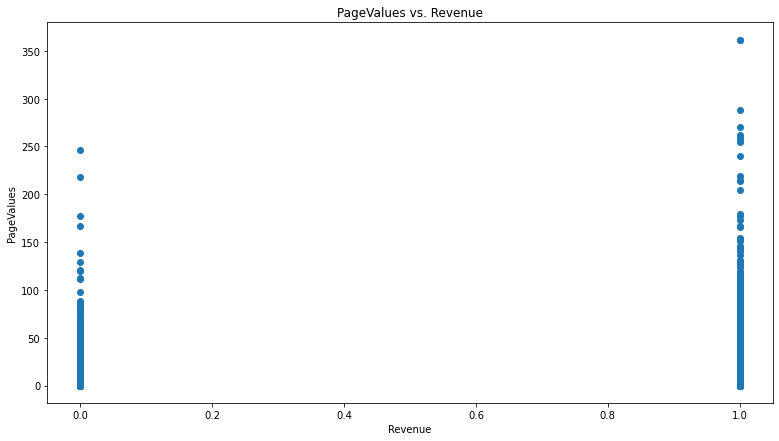

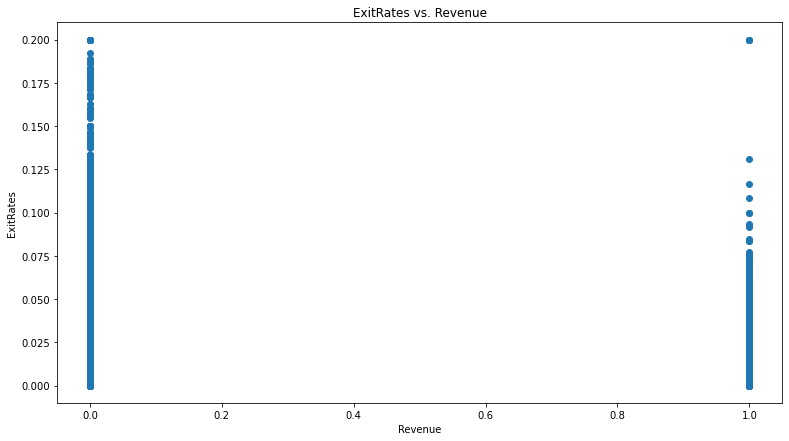

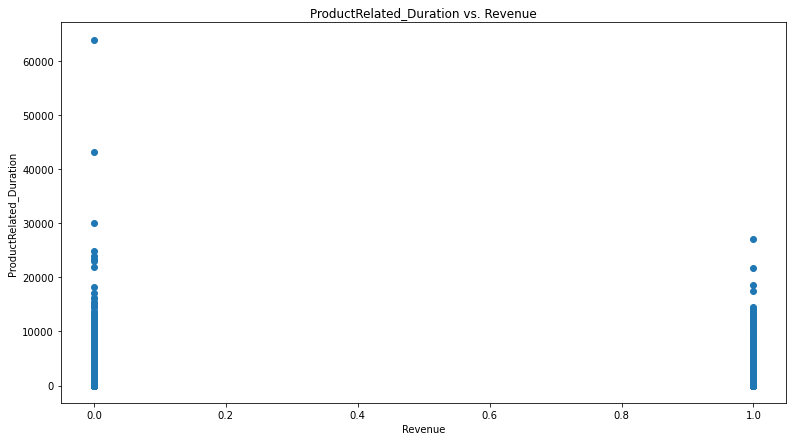

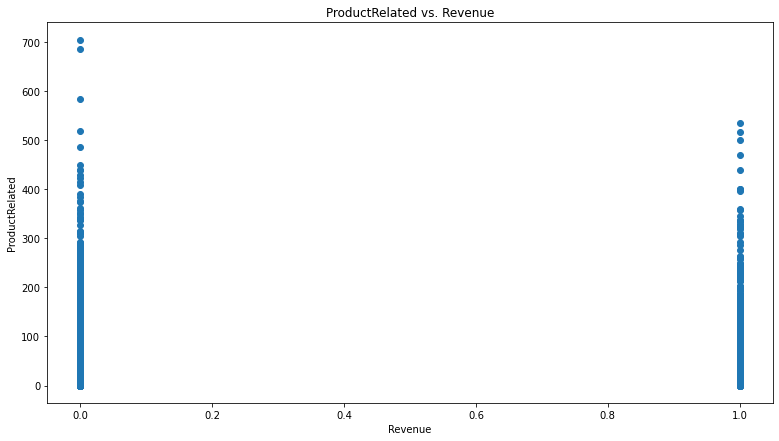

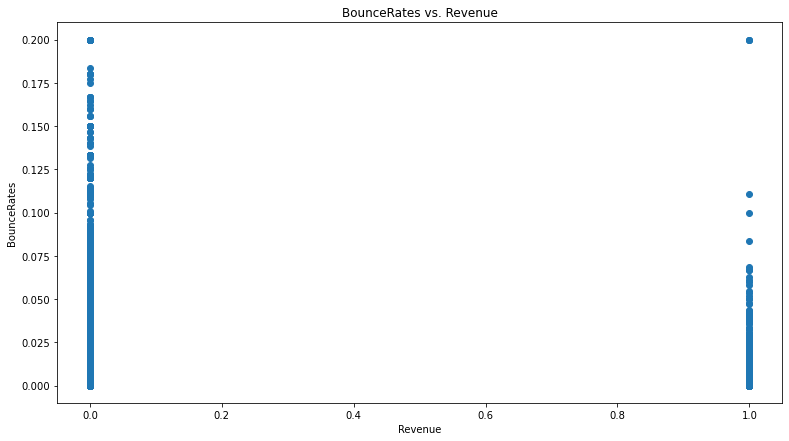

In [48]:
# plotting top 5 attributes against revenue
for i in range(len(im_fe)):
    plt.figure(figsize=(13,7))
    plt.scatter(df['Revenue'], df[im_fe[i]])
    plt.xlabel('Revenue')
    plt.ylabel(im_fe[i])
    plt.title('{} vs. Revenue'.format(im_fe[i]))
    plt.show()